In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
plt.style.use('seaborn-pastel')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

pd.options.display.max_rows=100
pd.options.display.max_columns=100

import missingno as msno

# %precision 3
pd.set_option('display.float_format', '{:.2f}'.format)

[주제] 데이터 구조 파악 및 데이터에 대한 기본 정보 추출(탐색적 데이터 분석)  
[내용] 실제 업무 기준으로 진행되는 프로세스에 따라 참여자분들이 실제 데이터 분석 프로젝트에 투입되었다는 가정하에 최초 수행되는 작업입니다.  
제공되는 데이터를 대상으로 기초통계 및 데이터 자체에 대한 의미 파악 및 분석 업무를 수행합니다.  
해당 과제 진행에 있어서 요구되는 내용은 다음과 같습니다.  

1) 제공되고 있는 데이터에 대한 기본 구조 및 현황 파악  
2) 데이터에 대한 각 속성별 특징 및 파악되고 있는 데이터 성격 내용 정리  
3) 해당 데이터를 바탕으로 진행 할 수 있는 분석 과제에 대한 리스트 업  
4) PPT 작성, 양식 자유, 최대 10페이지(간지 불요)

In [3]:
df = pd.read_csv('./train.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# (1) 제공되고 있는 데이터에 대한 기본 구조 및 현황 파악

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

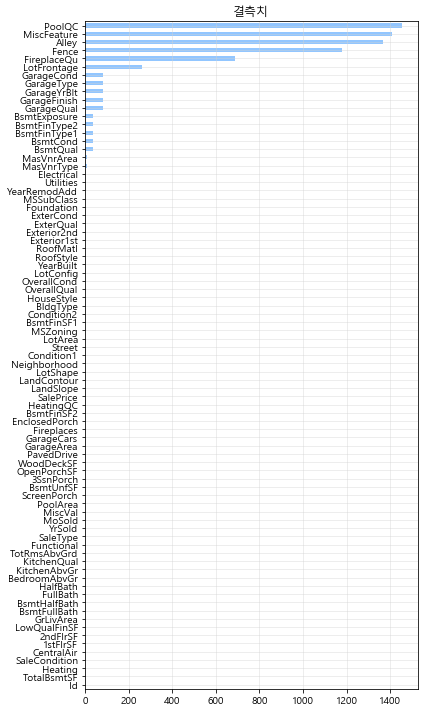

In [6]:
df.isnull().sum().sort_values().plot.barh(figsize=(6, 10), title='결측치')
plt.grid(color='lightgrey', alpha=0.5)
plt.tight_layout()

**결측치 : 19개 컬럼**  
PoolQC          1453  
MiscFeature     1406  
Alley           1369  
Fence           1179  
FireplaceQu      690  
LotFrontage      259  
GarageYrBlt       81  
GarageType        81  
GarageFinish      81  
GarageQual        81  
GarageCond        81  
BsmtFinType2      38  
BsmtExposure      38  
BsmtFinType1      37  
BsmtCond          37  
BsmtQual          37  
MasVnrArea         8  
MasVnrType         8  
Electrical         1  

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.00,730.50,421.61,1.00,365.75,730.50,1095.25,1460.00
MSSubClass,1460.00,56.90,42.30,20.00,20.00,50.00,70.00,190.00
LotFrontage,1201.00,70.05,24.28,21.00,59.00,69.00,80.00,313.00
LotArea,1460.00,10516.83,9981.26,1300.00,7553.50,9478.50,11601.50,215245.00
OverallQual,1460.00,6.10,1.38,1.00,5.00,6.00,7.00,10.00
OverallCond,1460.00,5.58,1.11,1.00,5.00,5.00,6.00,9.00
YearBuilt,1460.00,1971.27,30.20,1872.00,1954.00,1973.00,2000.00,2010.00
YearRemodAdd,1460.00,1984.87,20.65,1950.00,1967.00,1994.00,2004.00,2010.00
MasVnrArea,1452.00,103.69,181.07,0.00,0.00,0.00,166.00,1600.00
BsmtFinSF1,1460.00,443.64,456.10,0.00,0.00,383.50,712.25,5644.00


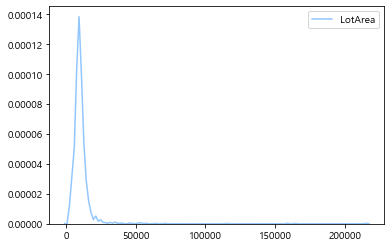

In [8]:
sns.kdeplot(df['LotArea'])

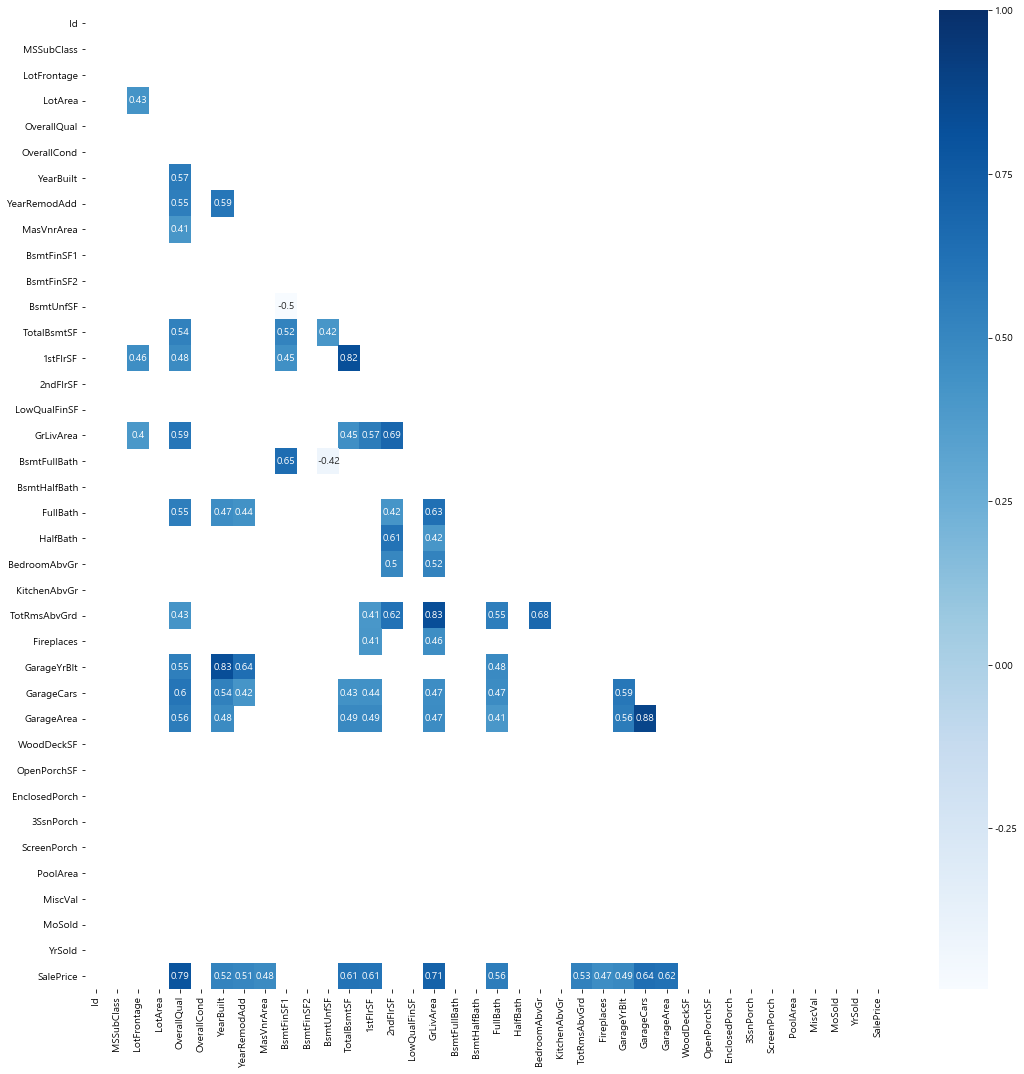

In [9]:
plt.figure(figsize=(18, 18))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr()[(df.corr()>=0.4) | (df.corr()<=-0.4)], 
           annot=True,
           annot_kws={'size':10},
           mask=mask,
           cmap=plt.cm.Blues)

**상관성이 높은 컬럼들**  
**음의 상관관계**  
BsmtUnfSF, BsmtFinSF1 : -0.5  
BsmtFullBath, BsmtUnfSF : -0.42  

**강한 양의 상관관계(0.5이상)**  
GarageArea, GarageCars : 0.88  
GarageYrBlt, YearBuilt : 0.83  
TotRmsAbvGrd, GrLiveArea : 0.83  
1stFlrSF, TotalBsmtSF : 0.82  
SalePrice, OverallQual : 0.79  
SalePrice, GrLiveArea : 0.71  
GrLiveArea, 2ndFlrSF : 0.69  
TotRmsAbvGrd, BedroomAbvGr : 0.68  
BsmtFullBath, BsmtFinSF1 : 0.65  
SalePrice, GarageCars : 0.64  
GarageYrBlt, YearRemodAdd : 0.64  
FullBath, GrLiveArea : 0.63  
SalePrice, GarageArea : 0.62  
TotRmsAbvGrd, 2ndFlrSF : 0.62  
SalePrice, TotalBsmtSF : 0.61  
SalePrice, 1stFlrSF : 0.61  
HalfBath, 2ndFlrSF : 0.61  
GarageCars, GarageYrBlt : 0.59  
YearRemodAdd, YearBuilt : 0.59  
GrLivArea, OverallQual : 0.59  
GrLiveArea, 1stFlrSF : 0.57  
YearBuilt,OverallQual : 0.57  
GarageArea, OverallQual : 0.56  
GarageArea, GarageYrBlt : 0.56  
SalePrice, FullBath : 0.56  
YearRemodAdd, OverallQual : 0.55  
FullBath, OverallQual : 0.55  
GarageYrBlt, OverallQual : 0.55  
TotRmsAbvGrd, FullBath : 0.55  
TotalBsmtSF, OverallQual : 0.54  
GarageCars, YearBuilt : 0.54  
SalePrice, TotRmsAbvGrd : 0.53  
SalePrice, YearBuilt : 0.52  
TotalBsmtSF, BsmtFinSF1 : 0.52  
BedroomAbvGr, GrLiveArea : 0.52   
SalePrice, YearRemodAdd : 0.51  
BedroomAbvGr ,2ndFlrSF : 0.5  

In [10]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.00,1460.00,1460,1201.00,1460.00,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.00,1460.00,1460.00,1460.00,1460,1460,1460,1460,1452,1452.00,1460,1460,1460,1423,1423,1422,1423,1460.00,1422,1460.00,1460.00,1460.00,1460,1460,1460,1459,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460,1460.00,1460,1460.00,770,1379,1379.00,1379,1460.00,1460.00,1379,1379,1460,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,7,281,54,1460.00,1460.00,1460.00,1460,1460,1460.00
unique,nan,nan,5,nan,nan,2,2,4,4,2,5,3,25,9,8,5,8,nan,nan,nan,nan,6,8,15,16,4,nan,4,5,6,4,4,4,6,nan,6,nan,nan,nan,6,5,2,5,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,4,nan,7,nan,5,6,nan,3,nan,nan,5,5,3,nan,nan,nan,nan,nan,nan,3,4,4,nan,nan,nan,9,6,nan
top,nan,nan,RL,nan,nan,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,nan,nan,nan,nan,Gable,CompShg,VinylSd,VinylSd,None,nan,TA,TA,PConc,TA,TA,No,Unf,nan,Unf,nan,nan,nan,GasA,Ex,Y,SBrkr,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,TA,nan,Typ,nan,Gd,Attchd,nan,Unf,nan,nan,TA,TA,Y,nan,nan,nan,nan,nan,nan,Gd,MnPrv,Shed,nan,nan,nan,WD,Normal,nan
freq,nan,nan,1151,nan,nan,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,nan,nan,nan,nan,1141,1434,515,504,864,nan,906,1282,647,649,1311,953,430,nan,1256,nan,nan,nan,1428,741,1365,1334,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,735,nan,1360,nan,380,870,nan,605,nan,nan,1311,1326,1340,nan,nan,nan,nan,nan,nan,3,157,49,nan,nan,nan,1267,1198,nan
mean,730.50,56.90,NaN,70.05,10516.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.10,5.58,1971.27,1984.87,NaN,NaN,NaN,NaN,NaN,103.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.64,NaN,46.55,567.24,1057.43,NaN,NaN,NaN,NaN,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,NaN,6.52,NaN,0.61,NaN,NaN,1978.51,NaN,1.77,472.98,NaN,NaN,NaN,94.24,46.66,21.95,3.41,15.06,2.76,NaN,NaN,NaN,43.49,6.32,2007.82,NaN,NaN,180921.20
std,421.61,42.30,NaN,24.28,9981.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.38,1.11,30.20,20.65,NaN,NaN,NaN,NaN,NaN,181.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.10,NaN,161.32,441.87,438.71,NaN,NaN,NaN,NaN,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,NaN,1.63,NaN,0.64,NaN,NaN,24.69,NaN,0.75,213.80,NaN,NaN,NaN,125.34,66.26,61.12,29.32,55.76,40.18,NaN,NaN,NaN,496.12,2.70,1.33,NaN,NaN,79442.50
min,1.00,20.00,NaN,21.00,1300.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.00,1872.00,1950.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,NaN,NaN,NaN,NaN,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,2.00,NaN,0.00,NaN,NaN,1900.00,NaN,0.00,0.00,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,1.00,2006.00,NaN,NaN,34900.00
25%,365.75,20.00,NaN,59.00,7553.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00,5.00,1954.00,1967.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.00,223.00,795.75,NaN,NaN,NaN,NaN,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,NaN,5.00,NaN,0.00,NaN,NaN,1961.00,NaN,1.00,334.50,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00,5.00,2007.00,NaN,NaN,129975.00
50%,730.50,50.00,NaN,69.00,9478.50,NaN,NaN,NaN,NaN,NaN,NaN,

In [12]:
print('Object Column name')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Object Column name
MSZoning 5
Street 2
Alley 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinType2 6
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
Functional 7
FireplaceQu 5
GarageType 6
GarageFinish 3
GarageQual 5
GarageCond 5
PavedDrive 3
PoolQC 3
Fence 4
MiscFeature 4
SaleType 9
SaleCondition 6


# (2) 데이터에 대한 각 속성별 특징 및 파악되고 있는 데이터 성격 내용 정리

In [13]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 어떤 컬럼들을 볼까?
- SalePrice와 상관성을 보이는 속성
- SalePrice에 영향을 줄 것 같은 범주형 속성

SalePrice와 상관관계(상관성 0.5이상) 보이는 컬럼

OverallQual(주택 전체 자재와 마감재에 대한 전반적인 평가)  
GrLivArea(지상 생활공간 평방피트)  
GarageCars(Size of garage in car capacity)  
GarageArea(Size of garage in square feet)  
TotalBsmtSF(Total square feet of basement area)  
1stFlrSF(First Floor square feet)  
FullBath(Full bathrooms above grade)  
TotRmsAbvGrd(Total rooms above grade (does not include bathrooms))  
YearBuilt(Original construction date)  
YearRemodAdd(Remodel date (same as construction date if no remodeling or additions))  

### (1) OverallQual

In [14]:
df['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [15]:
df['OverallQual'].describe()

count   1460.00
mean       6.10
std        1.38
min        1.00
25%        5.00
50%        6.00
75%        7.00
max       10.00
Name: OverallQual, dtype: float64

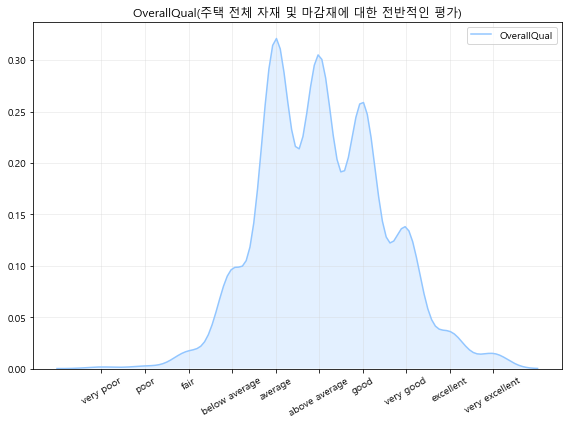

In [16]:
plt.style.use('seaborn-pastel')
plt.figure(figsize=(8, 6))
sns.kdeplot(df['OverallQual'], shade=True)
plt.grid(color='lightgrey', alpha=0.4)
label = ['very poor', 'poor', 'fair', 'below average', 'average', 'above average',
        'good', 'very good', 'excellent', 'very excellent']
plt.xticks(ticks=np.arange(1, 11), labels=label, rotation=30)
plt.title('OverallQual(주택 전체 자재 및 마감재에 대한 전반적인 평가)')
plt.tight_layout()

### (2) GrLivArea

In [17]:
df['GrLivArea'].value_counts()

864     22
1040    14
894     11
848     10
1456    10
        ..
3447     1
1396     1
1395     1
1393     1
2054     1
Name: GrLivArea, Length: 861, dtype: int64

In [18]:
df['GrLivArea'].describe()

count   1460.00
mean    1515.46
std      525.48
min      334.00
25%     1129.50
50%     1464.00
75%     1776.75
max     5642.00
Name: GrLivArea, dtype: float64

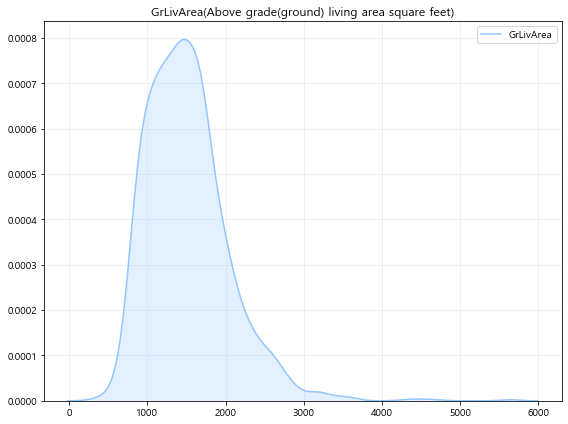

In [19]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['GrLivArea'], shade=True)
plt.grid(color='lightgrey', alpha=0.4)
plt.title('GrLivArea(Above grade(ground) living area square feet)')
plt.tight_layout()

### (3) GarageCars

In [20]:
df['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [21]:
df['GarageCars'].describe()

count   1460.00
mean       1.77
std        0.75
min        0.00
25%        1.00
50%        2.00
75%        2.00
max        4.00
Name: GarageCars, dtype: float64

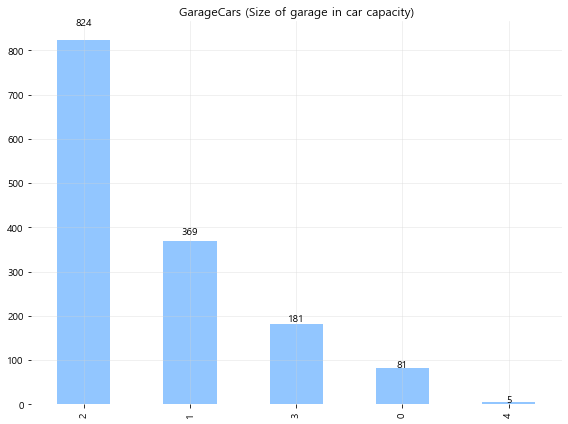

In [22]:
plt.figure(figsize=(8, 6))
ax = df['GarageCars'].value_counts().plot.bar()
plt.grid(color='lightgrey', alpha=0.4)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1d"%(height), (left+width/2, height*1.04), ha='center')
plt.box(False)
plt.title('GarageCars (Size of garage in car capacity)')
plt.tight_layout()

### (4) GarageArea

In [23]:
df['GarageArea'].value_counts()

0       81
440     49
576     47
240     38
484     34
        ..
754      1
459      1
458      1
756      1
1418     1
Name: GarageArea, Length: 441, dtype: int64

In [24]:
df['GarageArea'].describe()

count   1460.00
mean     472.98
std      213.80
min        0.00
25%      334.50
50%      480.00
75%      576.00
max     1418.00
Name: GarageArea, dtype: float64

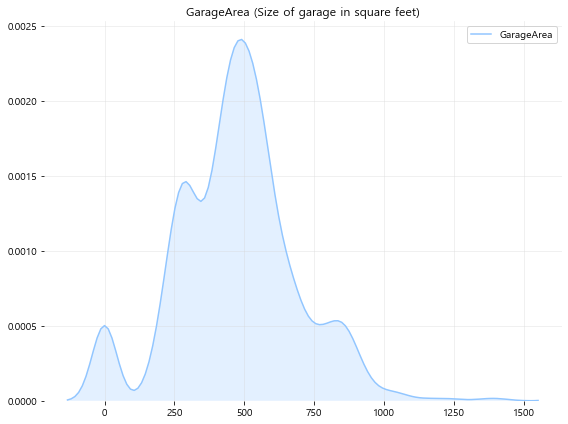

In [25]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['GarageArea'], shade=True)
plt.grid(color='lightgrey', alpha=0.4)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1d"%(height), (left+width/2, height*1.04), ha='center')
plt.box(False)
plt.title('GarageArea (Size of garage in square feet)')
plt.tight_layout()

### (5) TotalBsmtSF

In [26]:
df['TotalBsmtSF'].value_counts()

0       37
864     35
672     17
912     15
1040    14
        ..
1463     1
1459     1
1454     1
1019     1
2046     1
Name: TotalBsmtSF, Length: 721, dtype: int64

In [27]:
df['TotalBsmtSF'].describe()

count   1460.00
mean    1057.43
std      438.71
min        0.00
25%      795.75
50%      991.50
75%     1298.25
max     6110.00
Name: TotalBsmtSF, dtype: float64

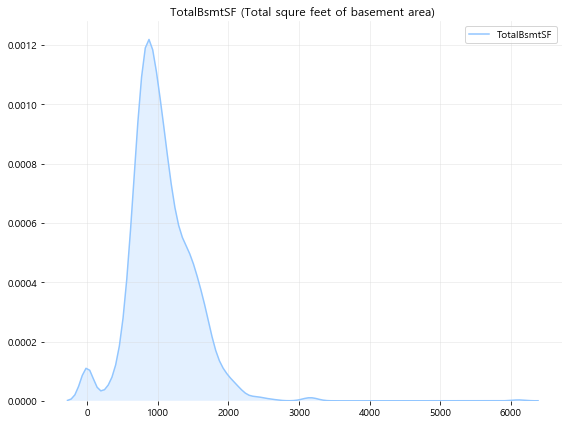

In [28]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['TotalBsmtSF'], shade=True)
plt.grid(color='lightgrey', alpha=0.4)
# for p in ax.patches:
#     left, bottom, width, height = p.get_bbox().bounds
#     ax.annotate("%.1d"%(height), (left+width/2, height*1.04), ha='center')
plt.box(False)
plt.title('TotalBsmtSF (Total squre feet of basement area)')
plt.tight_layout()

### (6) 1stFlrSF(First Floor square feet)

In [29]:
df['1stFlrSF'].value_counts()

864     25
1040    16
912     14
848     12
894     12
        ..
1285     1
1287     1
1288     1
1297     1
2053     1
Name: 1stFlrSF, Length: 753, dtype: int64

In [30]:
df['1stFlrSF'].describe()

count   1460.00
mean    1162.63
std      386.59
min      334.00
25%      882.00
50%     1087.00
75%     1391.25
max     4692.00
Name: 1stFlrSF, dtype: float64

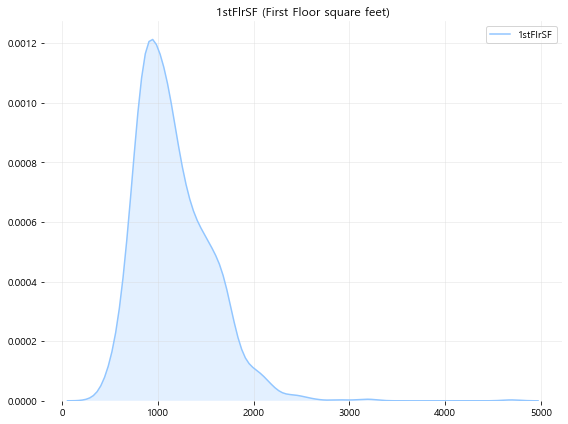

In [31]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['1stFlrSF'], shade=True)
plt.grid(color='lightgrey', alpha=0.4)
# for p in ax.patches:
#     left, bottom, width, height = p.get_bbox().bounds
#     ax.annotate("%.1d"%(height), (left+width/2, height*1.04), ha='center')
plt.box(False)
plt.title('1stFlrSF (First Floor square feet)')
plt.tight_layout()

### (7) FullBath(Full bathrooms above grade)

In [32]:
df['FullBath'].value_counts()

2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

In [33]:
df['FullBath'].describe()

count   1460.00
mean       1.57
std        0.55
min        0.00
25%        1.00
50%        2.00
75%        2.00
max        3.00
Name: FullBath, dtype: float64

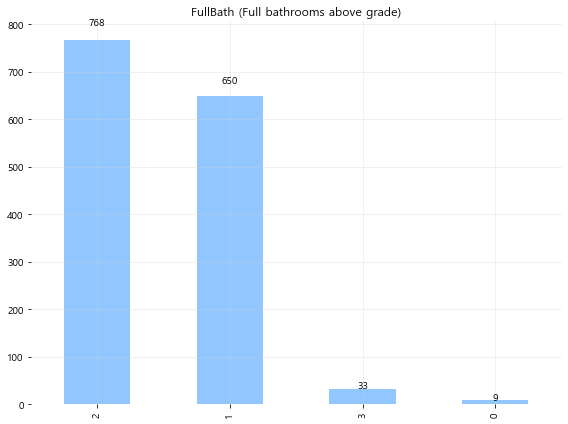

In [34]:
plt.figure(figsize=(8, 6))
ax = df['FullBath'].value_counts().plot.bar()
plt.grid(color='lightgrey', alpha=0.4)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1d"%(height), (left+width/2, height*1.04), ha='center')
plt.box(False)
plt.title('FullBath (Full bathrooms above grade)')
plt.tight_layout()

### (8) TotRmsAbvGrd
(Total rooms above grade (does not include bathrooms))

In [35]:
df['TotRmsAbvGrd'].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

In [40]:
df['TotRmsAbvGrd'].describe()

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64

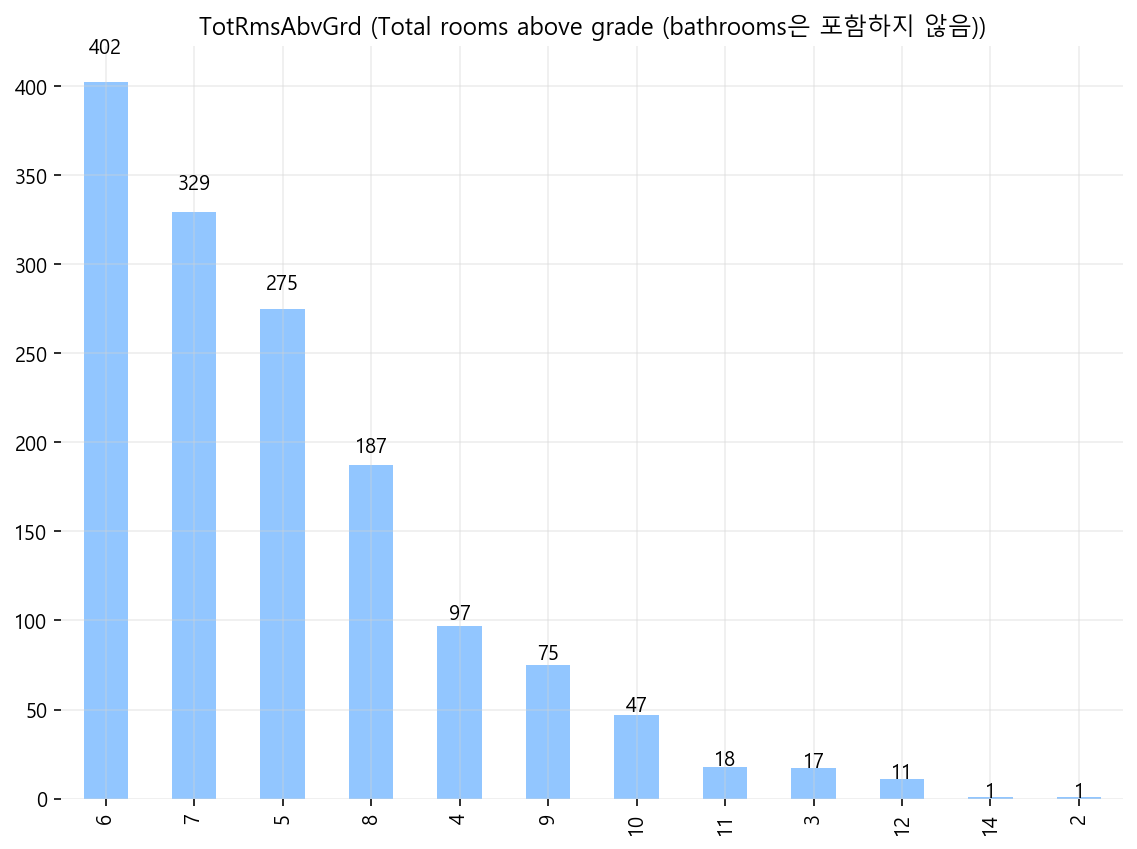

In [41]:
plt.figure(figsize=(8, 6))
ax = df['TotRmsAbvGrd'].value_counts().plot.bar()
plt.grid(color='lightgrey', alpha=0.4)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1d"%(height), (left+width/2, height*1.04), ha='center')
plt.box(False)
plt.title('TotRmsAbvGrd (Total rooms above grade (bathrooms은 포함하지 않음))')
plt.tight_layout()

### (9) YearBuilt  (Original construction date)

In [42]:
df['YearBuilt'].value_counts().sort_index()

1872     1
1875     1
1880     4
1882     1
1885     2
        ..
2006    67
2007    49
2008    23
2009    18
2010     1
Name: YearBuilt, Length: 112, dtype: int64

In [43]:
df['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

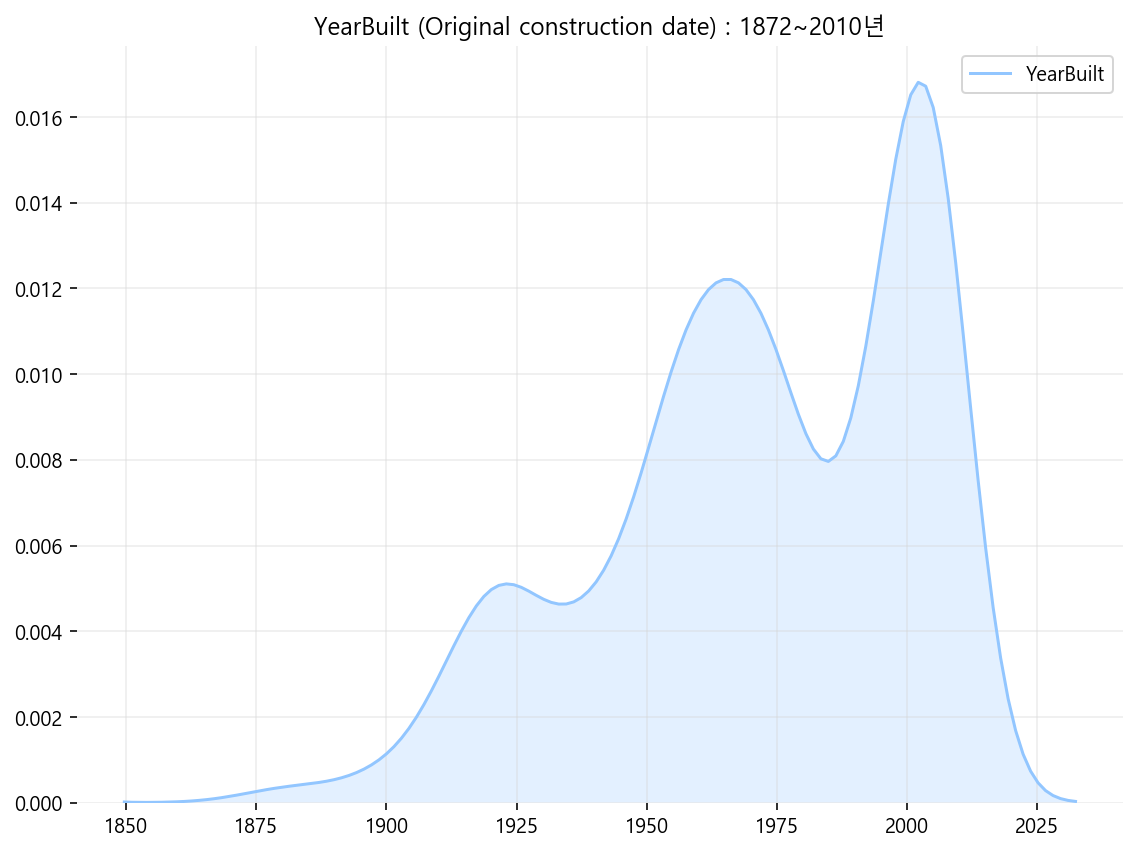

In [44]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['YearBuilt'], shade=True)
plt.grid(color='lightgrey', alpha=0.4)
# for p in ax.patches:
#     left, bottom, width, height = p.get_bbox().bounds
#     ax.annotate("%.1d"%(height), (left+width/2, height*1.04), ha='center')
plt.box(False)
plt.title('YearBuilt (Original construction date) : 1872~2010년')
plt.tight_layout()

### (10) YearRemodAdd
(Remodel date (same as construction date if no remodeling or additions))

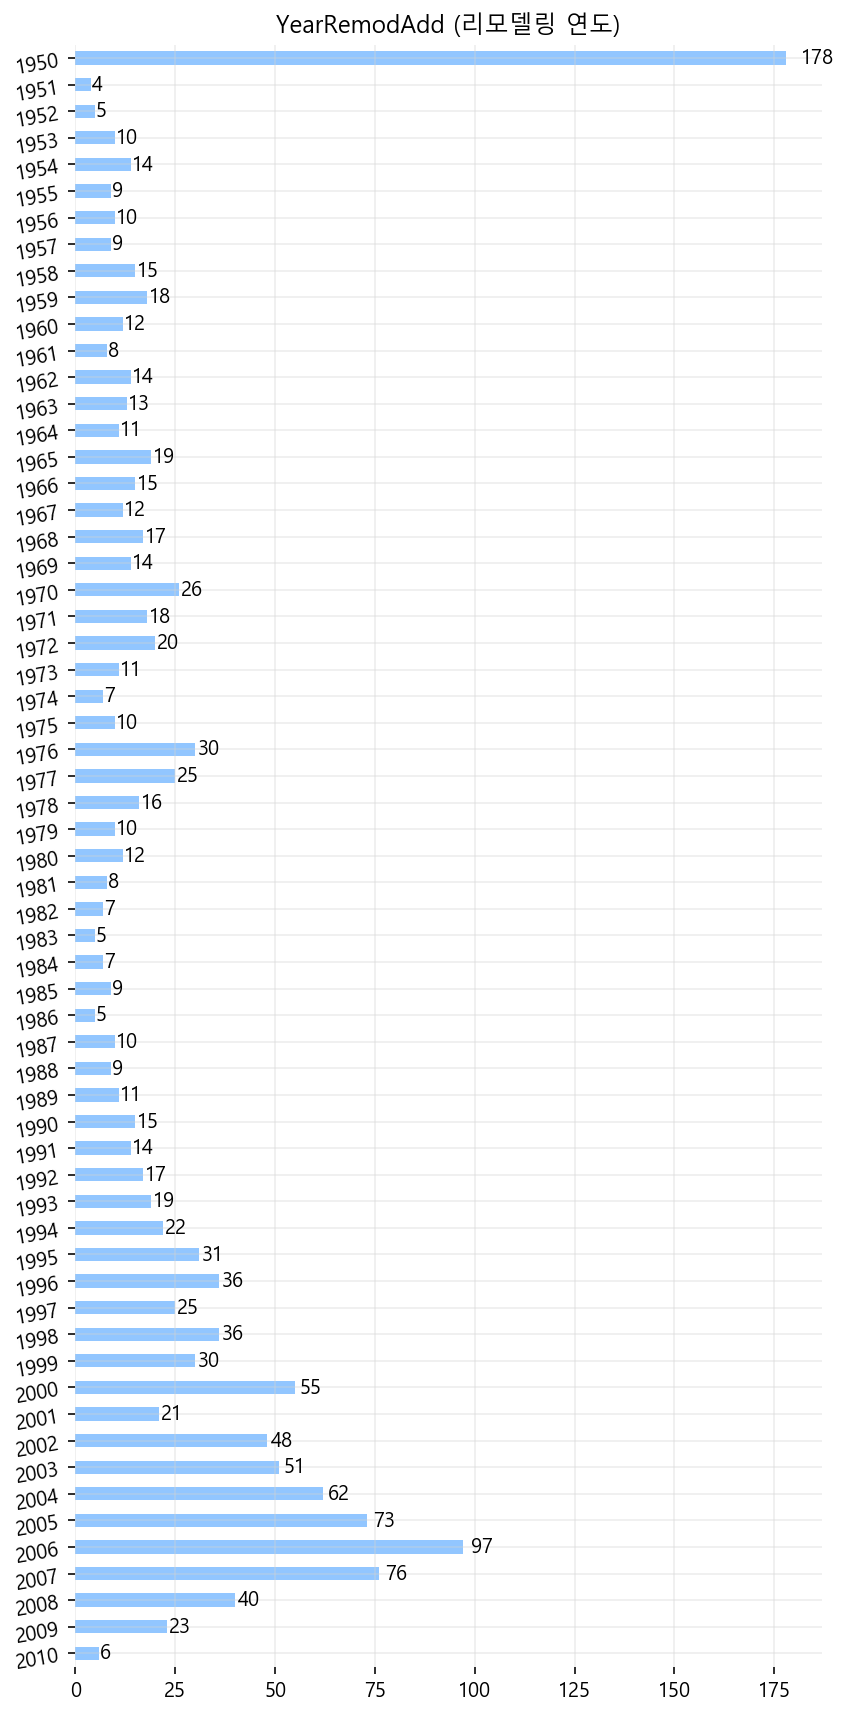

In [45]:
ax = df['YearRemodAdd'].value_counts().sort_index(ascending=False).plot.barh(rot=10, figsize=(6, 12))
plt.grid(color='lightgrey', alpha=0.4)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.text(width*1.02, bottom+height/2, '%.1d'%(width), va='center')
#     ax.annotate("%.1d"%(height), (left+width/2, height*1.04), ha='center')
plt.box(False)
plt.title('YearRemodAdd (리모델링 연도)')
plt.tight_layout()

### 범주형 컬럼
#### 어떤 범주형 속성이 부동산 가격에 영향을 미칠까?

In [46]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
print('범주형 컬럼')
a=[]
for col in df.columns:
    if df[col].dtype=='object':
        a.append(col)
        print(col, df[col].nunique())
print(a)

범주형 컬럼
MSZoning 5
Street 2
Alley 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinType2 6
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
KitchenQual 4
Functional 7
FireplaceQu 5
GarageType 6
GarageFinish 3
GarageQual 5
GarageCond 5
PavedDrive 3
PoolQC 3
Fence 4
MiscFeature 4
SaleType 9
SaleCondition 6
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageTy

In [38]:
# 범주형 컬럼과 부동산 가격으로만 구성된 데이터프레임
def renew(df):
    box = []
    for col in df.columns:
        if df[col].dtype=='object':
            box.append(col)
    return box

# [col for col in df.columns if df[col].dtype=='object']

In [39]:
df_copy = df.copy()

In [40]:
col = renew(df_copy)
df_obj = df_copy[col]
print(df_obj.shape)
df_obj.head()

(1460, 43)


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [41]:
df_obj['Id'] = df['Id'].values

In [42]:
df_obj.set_index('Id', inplace=True)
df_obj.reset_index(inplace=True)
df_obj.head()

,Id,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [43]:
df_obj['SalePrice'] = df['SalePrice'].values
df_obj.head()

,Id,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000


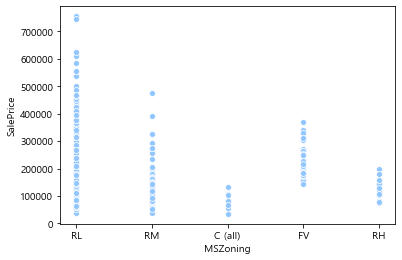

In [44]:
sns.scatterplot(data=df_obj, x='MSZoning', y='SalePrice')

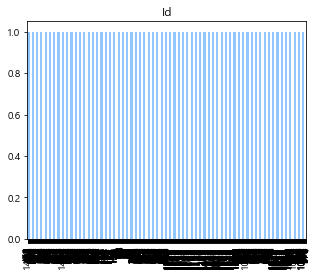

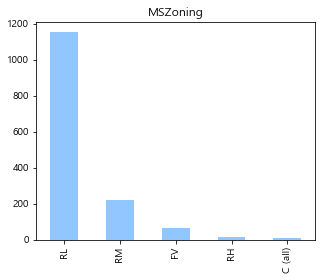

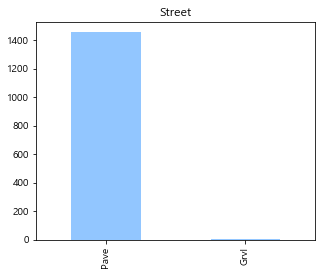

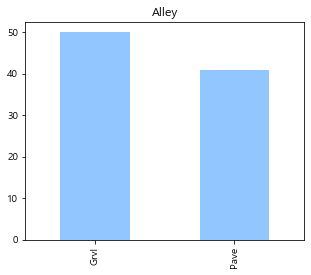

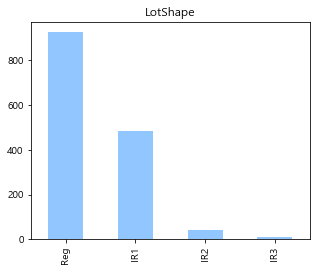

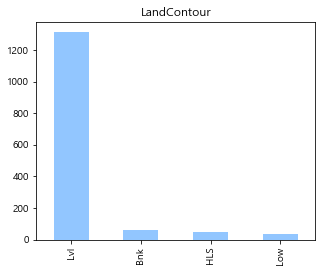

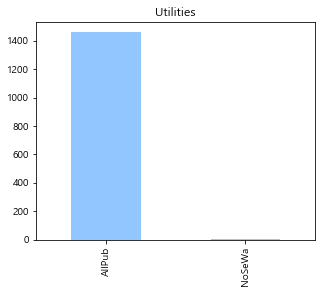

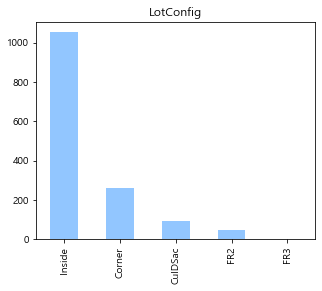

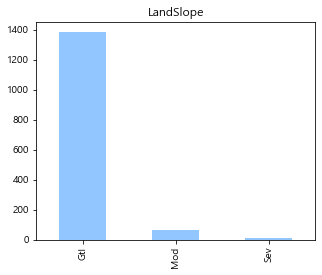

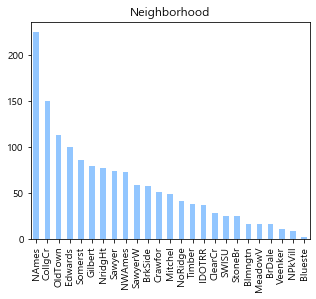

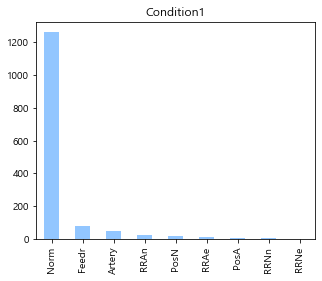

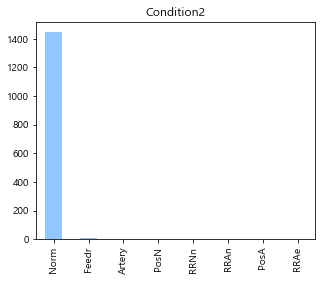

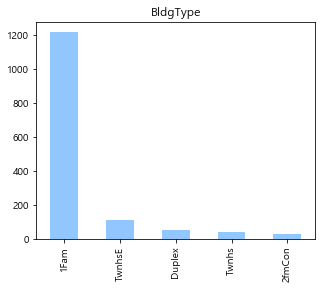

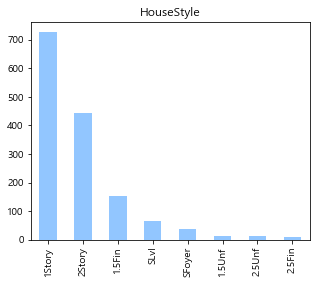

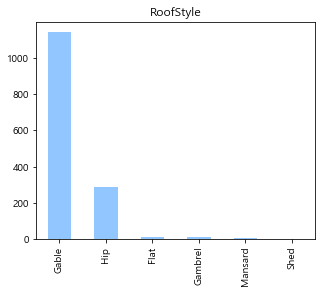

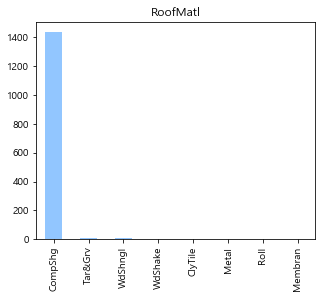

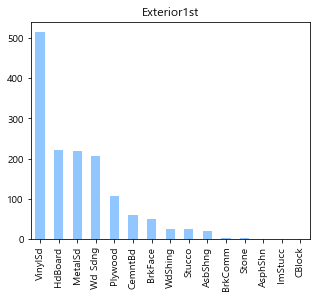

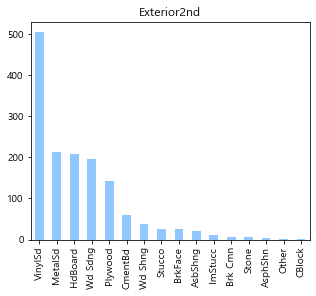

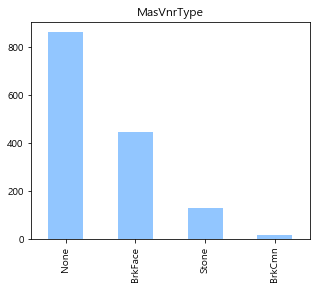

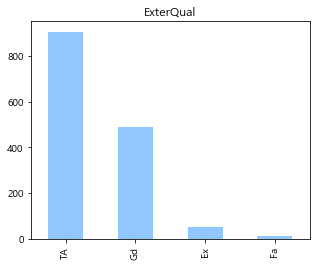

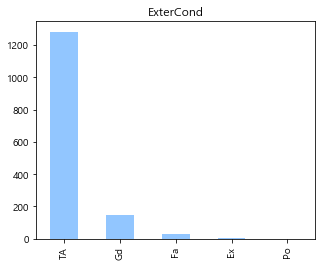

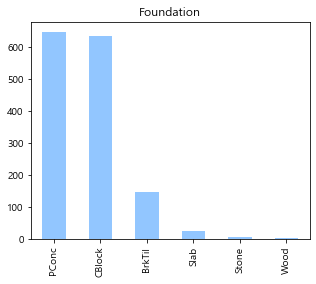

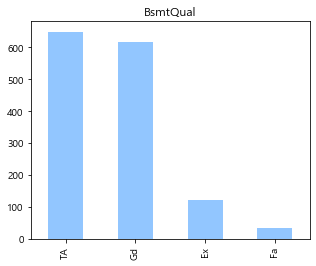

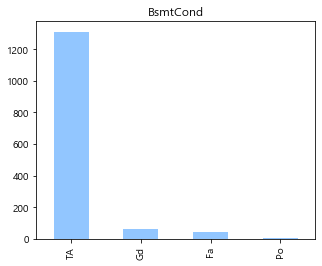

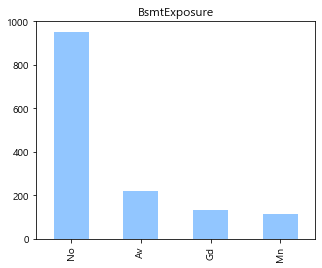

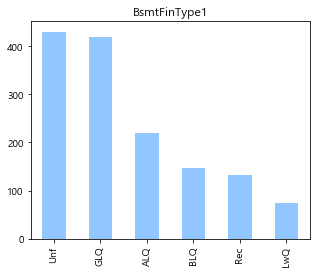

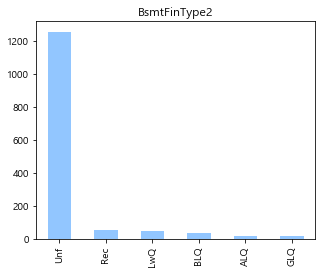

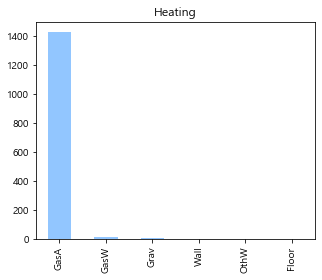

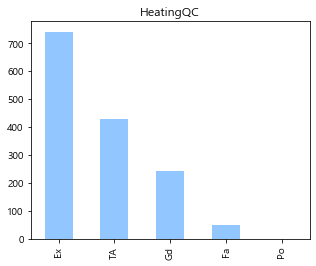

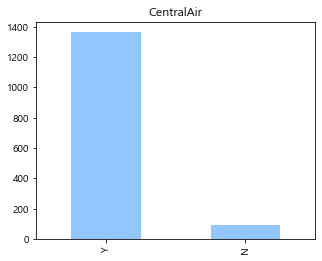

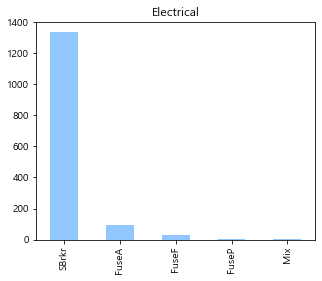

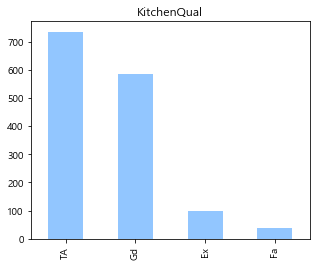

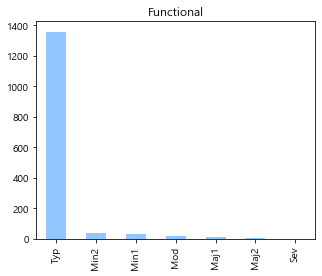

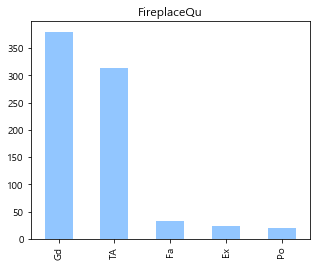

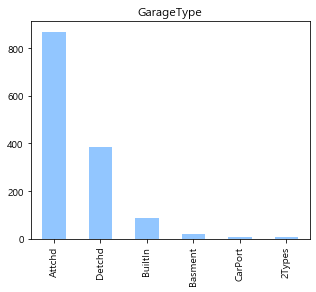

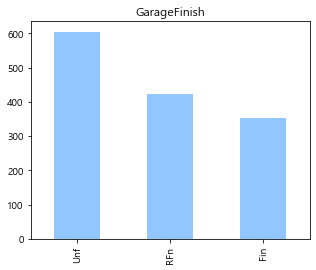

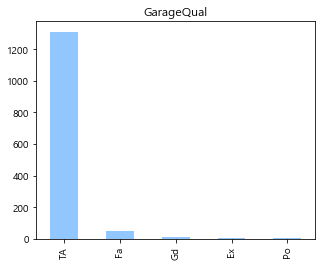

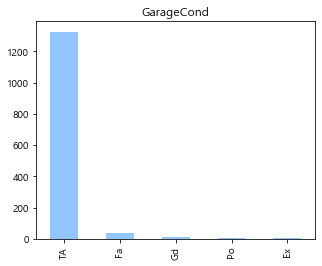

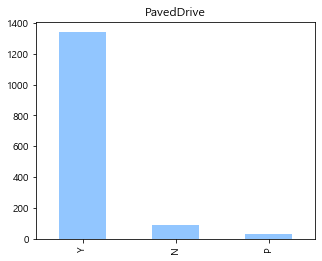

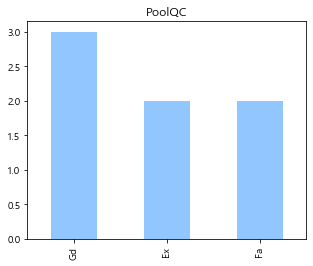

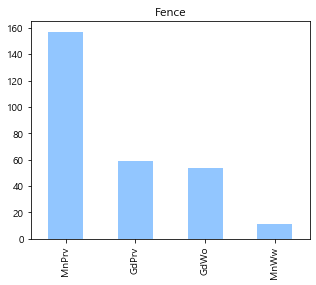

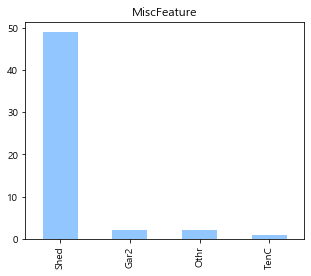

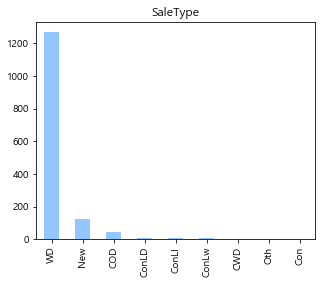

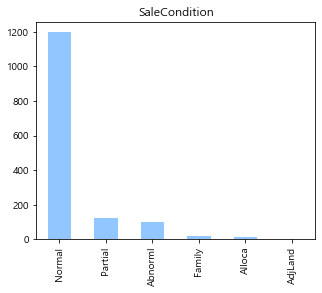

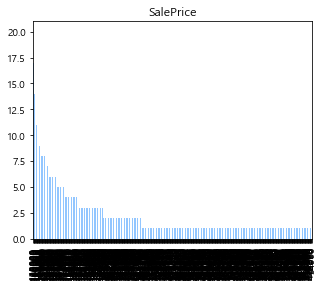

In [45]:
for col in df_obj.columns: 
    plt.figure(figsize=(5,4))
    df_obj[col].value_counts().plot.bar()
    plt.title(col)
    plt.show()

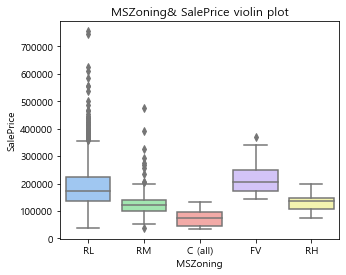

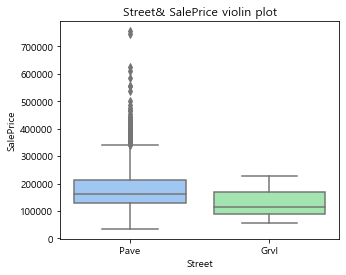

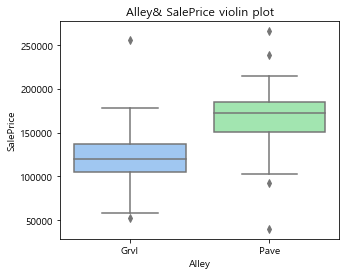

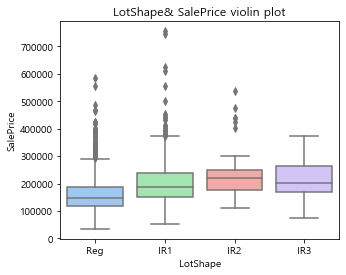

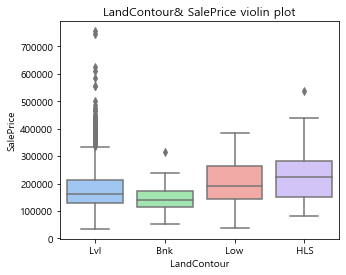

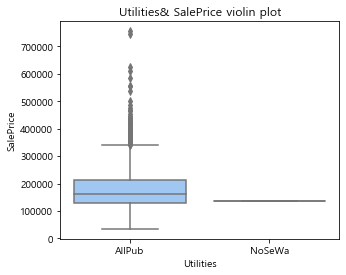

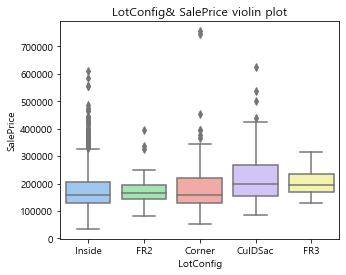

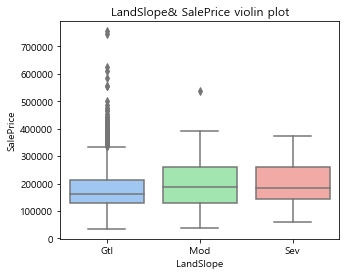

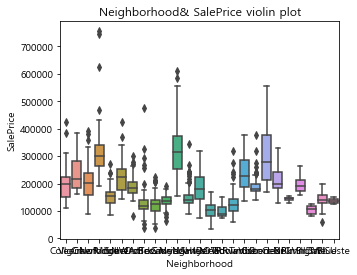

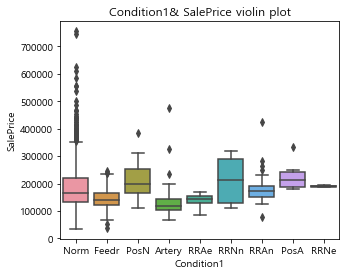

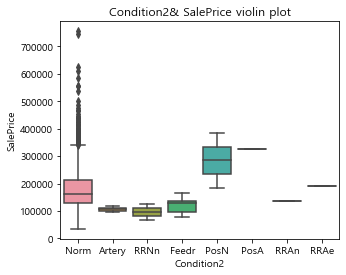

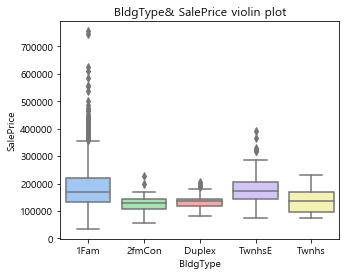

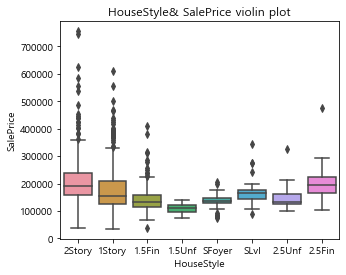

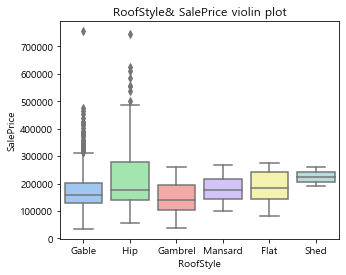

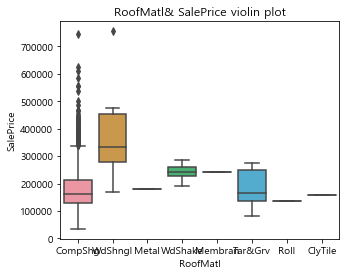

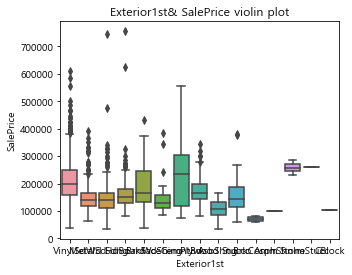

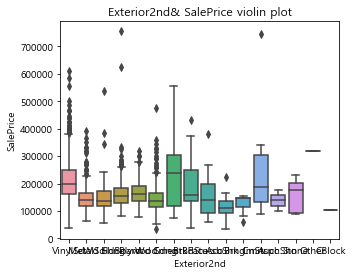

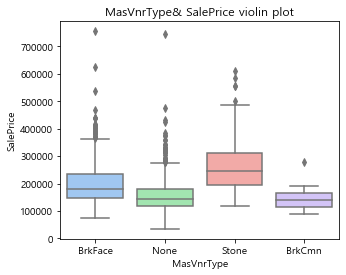

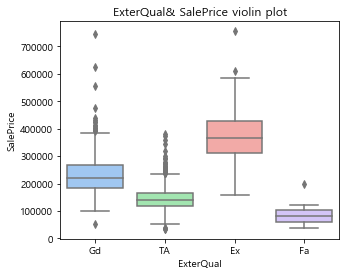

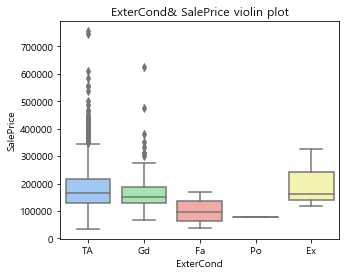

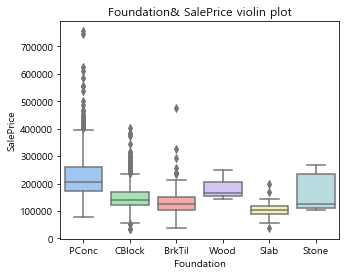

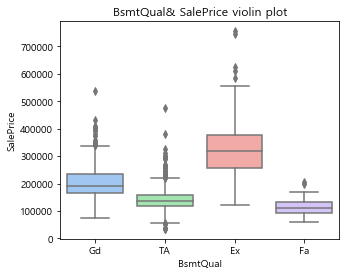

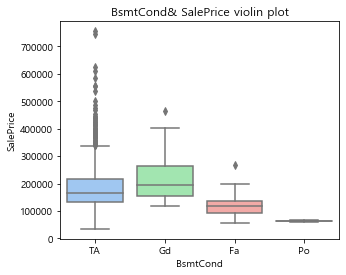

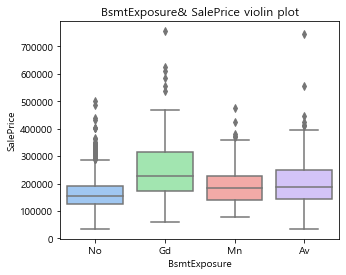

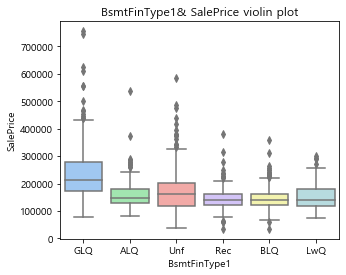

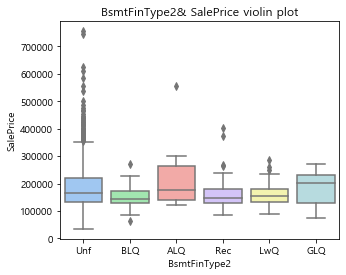

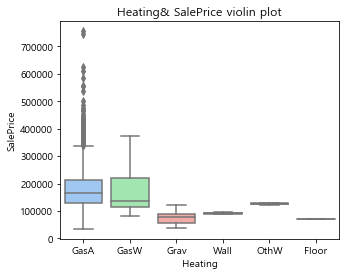

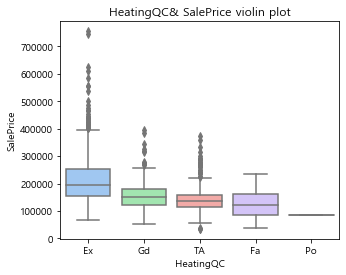

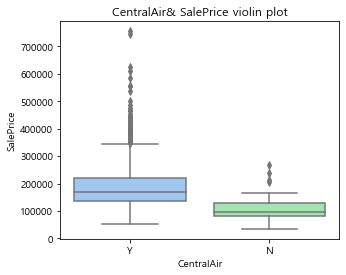

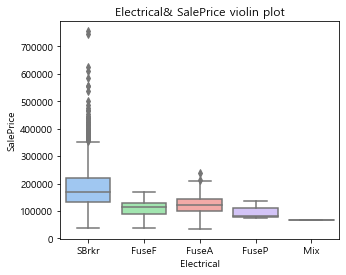

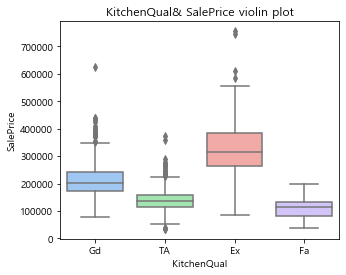

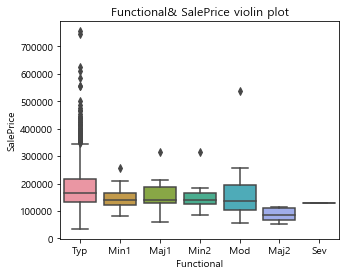

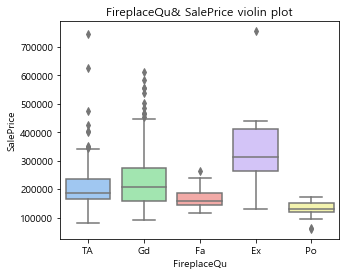

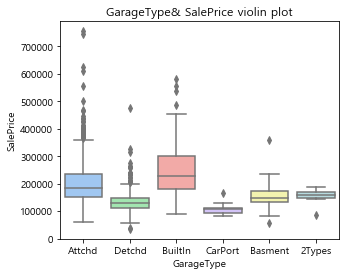

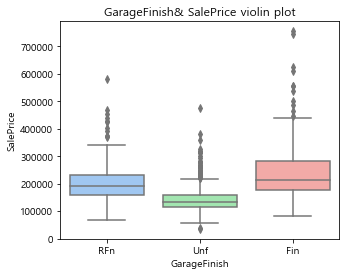

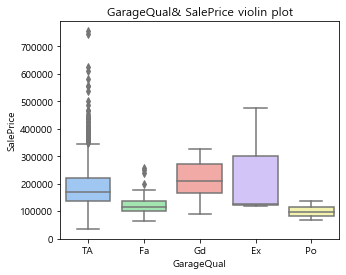

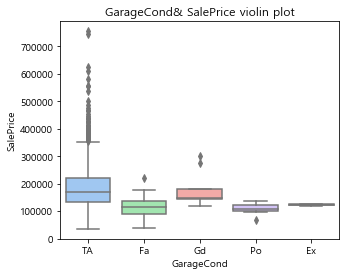

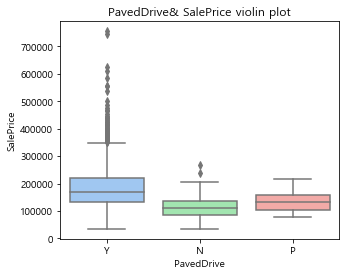

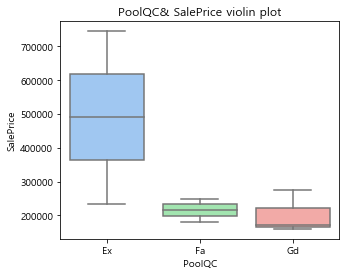

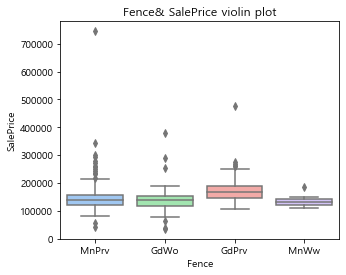

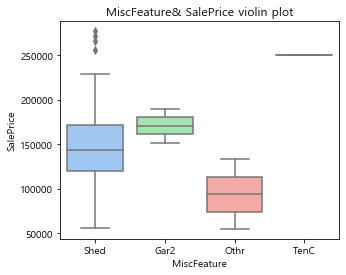

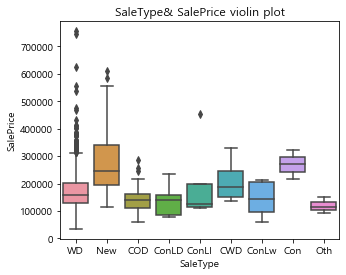

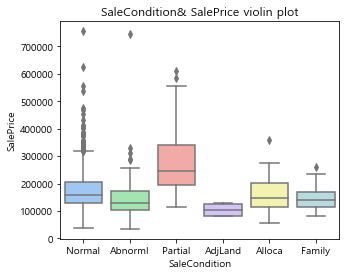

In [46]:
for col in df_obj.columns[1:-1]:
    plt.figure(figsize=(5, 4))
    sns.boxplot(data=df_obj, x=f'{col}', y='SalePrice')
    plt.title(f'{col}'+'& SalePrice violin plot')
    plt.show()

**개수 차이가 심한 변수는 제외(개수가 비교적 고른 변수)**  
Alley  
Neighborhood  
BsmtQual  
BsmtFinType1  
HeatingQC  
GarageFinish  
PoolQC  
Fence  
KitchenQual  

### 카이제곱 검정을 통해 변수 간 유의미한 관계 검정(이후 t검정을 통해 수치형 변수 SalePrice와의 관계 검정)

In [47]:
df_obj2 = df_obj[['Alley',
'Neighborhood',
'BsmtQual',
'BsmtFinType1',
'HeatingQC',
'GarageFinish',
'PoolQC',
'Fence',
'KitchenQual']]

In [48]:
df_obj2.head()

,Alley,Neighborhood,BsmtQual,BsmtFinType1,HeatingQC,GarageFinish,PoolQC,Fence,KitchenQual
0,NaN,CollgCr,Gd,GLQ,Ex,RFn,NaN,NaN,Gd
1,NaN,Veenker,Gd,ALQ,Ex,RFn,NaN,NaN,TA
2,NaN,CollgCr,Gd,GLQ,Ex,RFn,NaN,NaN,Gd
3,NaN,Crawfor,TA,ALQ,Gd,Unf,NaN,NaN,Gd
4,NaN,NoRidge,Gd,GLQ,Ex,RFn,NaN,NaN,Gd


In [49]:
df_obj2.isnull().sum()

Alley           1369
Neighborhood       0
BsmtQual          37
BsmtFinType1      37
HeatingQC          0
GarageFinish      81
PoolQC          1453
Fence           1179
KitchenQual        0
dtype: int64

In [50]:
df_obj2.shape

(1460, 9)

In [51]:
# 결측치 많은 컬럼 제거
df_obj2.drop(columns=['Alley', 'PoolQC', 'Fence'], inplace=True)
df_obj2.head()

,Neighborhood,BsmtQual,BsmtFinType1,HeatingQC,GarageFinish,KitchenQual
0,CollgCr,Gd,GLQ,Ex,RFn,Gd
1,Veenker,Gd,ALQ,Ex,RFn,TA
2,CollgCr,Gd,GLQ,Ex,RFn,Gd
3,Crawfor,TA,ALQ,Gd,Unf,Gd
4,NoRidge,Gd,GLQ,Ex,RFn,Gd


귀무가설 H0 : 두 변수들 간에 관계가 없다  
대립가설 H1 : 두 변수들 간에 관계가 있다

In [52]:
from scipy import stats

In [53]:
df_obj2.head()

,Neighborhood,BsmtQual,BsmtFinType1,HeatingQC,GarageFinish,KitchenQual
0,CollgCr,Gd,GLQ,Ex,RFn,Gd
1,Veenker,Gd,ALQ,Ex,RFn,TA
2,CollgCr,Gd,GLQ,Ex,RFn,Gd
3,Crawfor,TA,ALQ,Gd,Unf,Gd
4,NoRidge,Gd,GLQ,Ex,RFn,Gd


In [201]:
neigh_bsmtqual = pd.crosstab(df_obj2['Neighborhood'], df_obj2['BsmtQual'])
neigh_bsmtfintype1 = pd.crosstab(df_obj2['Neighborhood'], df_obj2['BsmtFinType1'])
neigh_heatingQC = pd.crosstab(df_obj2['Neighborhood'], df_obj2['HeatingQC'])
neigh_garagefinish = pd.crosstab(df_obj2['Neighborhood'], df_obj2['GarageFinish'])
neigh_kitchenqual = pd.crosstab(df_obj2['Neighborhood'], df_obj2['KitchenQual'])

bsmtqual_bsmtfintype1 = pd.crosstab(df_obj2['BsmtQual'], df_obj2['BsmtFinType1'])
bsmtqual_heatingqc = pd.crosstab(df_obj2['BsmtQual'], df_obj2['HeatingQC'])
bsmtqual_garagefinish = pd.crosstab(df_obj2['BsmtQual'], df_obj2['GarageFinish'])
bsmtqual_kitchenqual = pd.crosstab(df_obj2['BsmtQual'], df_obj2['KitchenQual'])

bsmtfintype1_heatingqc = pd.crosstab(df_obj2['BsmtFinType1'], df_obj2['HeatingQC'])
bsmtfintype1_garagefinish = pd.crosstab(df_obj2['BsmtFinType1'], df_obj2['GarageFinish'])
bsmtfintype1_kitchenqual = pd.crosstab(df_obj2['BsmtFinType1'], df_obj2['KitchenQual'])

heatingqc_garagefinish = pd.crosstab(df_obj2['HeatingQC'], df_obj2['GarageFinish'])
heatingqc_kitchenqual = pd.crosstab(df_obj2['HeatingQC'], df_obj2['KitchenQual'])

garagefinish_kitchenqual = pd.crosstab(df_obj2['GarageFinish'], df_obj2['KitchenQual'])

In [202]:
print(stats.chi2_contingency(neigh_bsmtqual, correction=False)[1])
print(stats.chi2_contingency(neigh_bsmtfintype1, correction=False)[1])
print(stats.chi2_contingency(neigh_heatingQC, correction=False)[1])
print(stats.chi2_contingency(neigh_garagefinish, correction=False)[1])
print(stats.chi2_contingency(neigh_kitchenqual, correction=False)[1])
print(stats.chi2_contingency(bsmtqual_bsmtfintype1, correction=False)[1])
print(stats.chi2_contingency(bsmtqual_heatingqc, correction=False)[1])
print(stats.chi2_contingency(bsmtqual_garagefinish, correction=False)[1])
print(stats.chi2_contingency(bsmtqual_kitchenqual, correction=False)[1])
print(stats.chi2_contingency(bsmtfintype1_heatingqc, correction=False)[1])
print(stats.chi2_contingency(bsmtfintype1_garagefinish, correction=False)[1])
print(stats.chi2_contingency(bsmtfintype1_kitchenqual, correction=False)[1])
print(stats.chi2_contingency(heatingqc_garagefinish, correction=False)[1])
print(stats.chi2_contingency(heatingqc_kitchenqual, correction=False)[1])
print(stats.chi2_contingency(garagefinish_kitchenqual, correction=False)[1])

1.186727150740392e-222
1.2426448590143668e-103
2.1046561999389375e-75
6.040329373816599e-110
2.7201322013108714e-150
2.2499926697592885e-94
1.680162768180243e-62
6.363799214866666e-96
2.0667468654643634e-157
4.324154643858514e-42
2.0764035827989555e-35
2.795096280163302e-63
1.5131222241916097e-46
8.18025531851429e-90
1.273495190617634e-70


In [206]:
1.186727150740392e-222

0.000

In [207]:
1.2426448590143668e-103

0.000

In [208]:
2.1046561999389375e-75

0.000

In [209]:
6.040329373816599e-110

0.000

In [210]:
2.7201322013108714e-150

0.000

In [211]:
2.2499926697592885e-94

0.000

In [212]:
1.680162768180243e-62

0.000

In [229]:
6.363799214866666e-96

0.000

In [228]:
2.0667468654643634e-157

0.000

In [227]:
4.324154643858514e-42

0.000

In [216]:
2.0764035827989555e-35

0.000

In [226]:
2.795096280163302e-63

0.000

In [225]:
1.5131222241916097e-46

0.000

In [224]:
8.18025531851429e-90

0.000

In [223]:
1.273495190617634e-70

0.000

**6개 컬럼 모두 서로 연관이 관련이 있음**

In [16]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 수치형 변수 & 범주형 변수

In [17]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


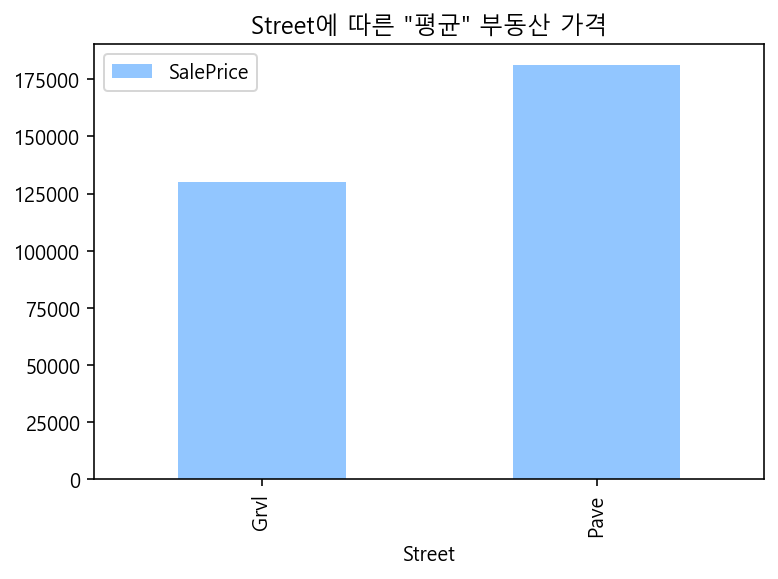

In [26]:
df.groupby('Street')['SalePrice'].mean().to_frame().plot(kind='bar',
                                                        title='Street에 따른 "평균" 부동산 가격')

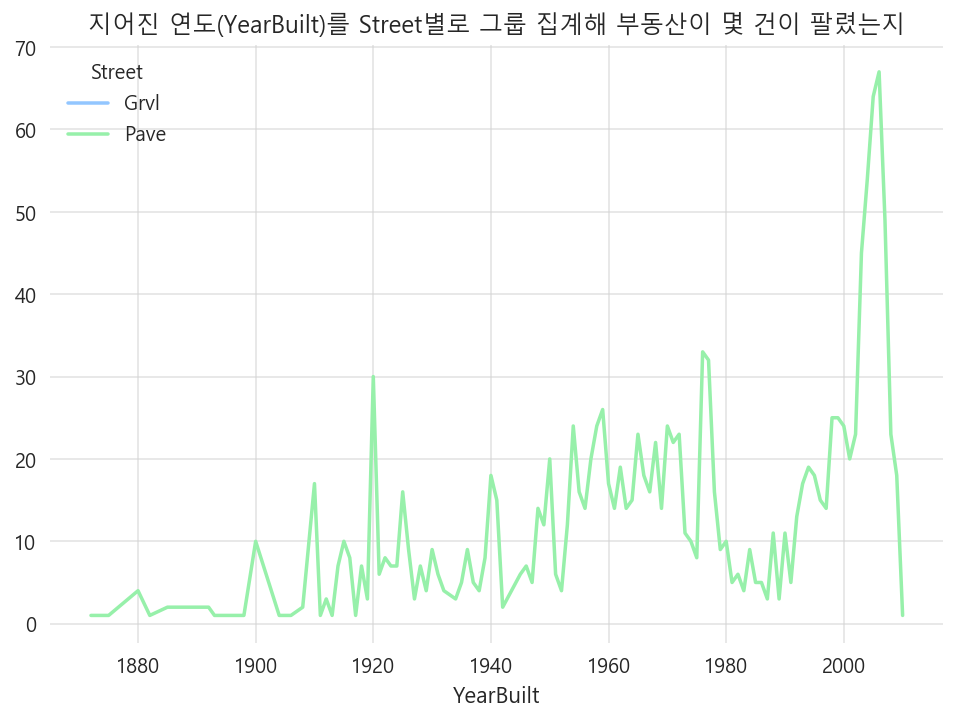

In [66]:
plt.style.use('seaborn-pastel')
sns.set_style('white')
plt.rc('font', family='Malgun Gothic')
df.groupby(['YearBuilt', 'Street'])['SalePrice'].count().unstack().plot(
title='지어진 연도(YearBuilt)를 Street별로 그룹 집계해 부동산이 몇 건이 팔렸는지')
plt.grid(color='lightgrey', alpha=0.5)

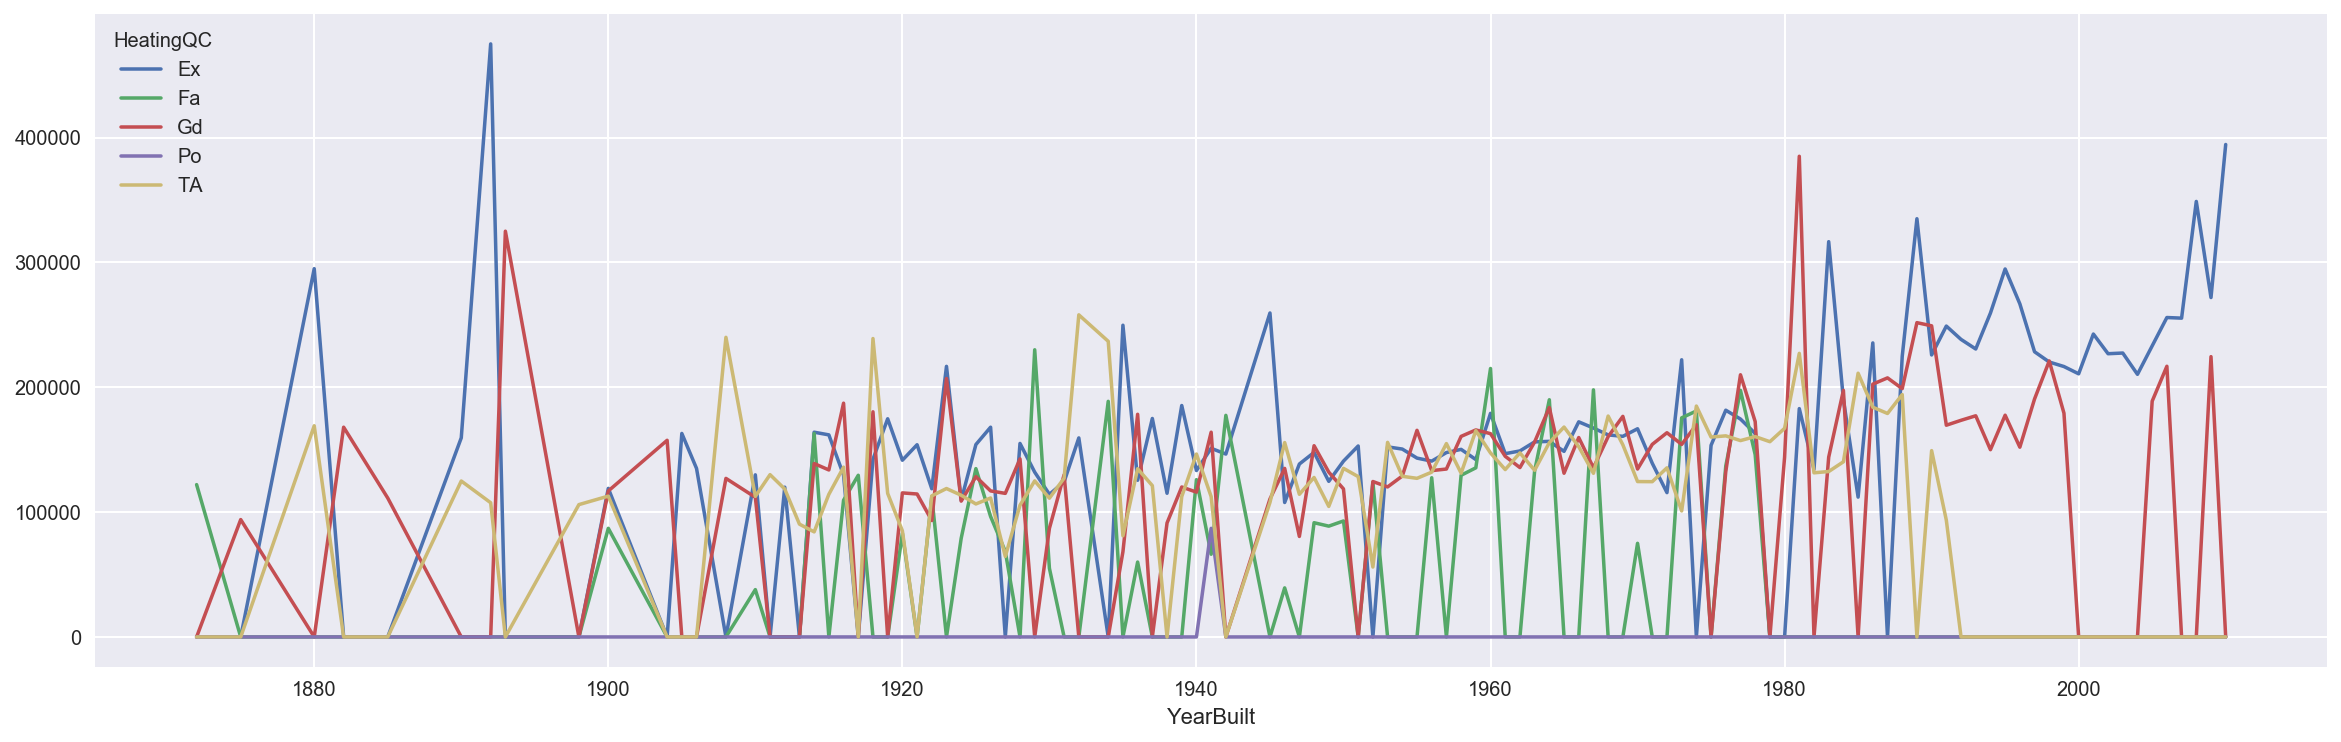

In [45]:
plt.style.use('seaborn')
df.groupby(['YearBuilt', 'HeatingQC'])['SalePrice'].mean().unstack().fillna(0).\
plot(figsize=(20, 6))

In [67]:
df['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

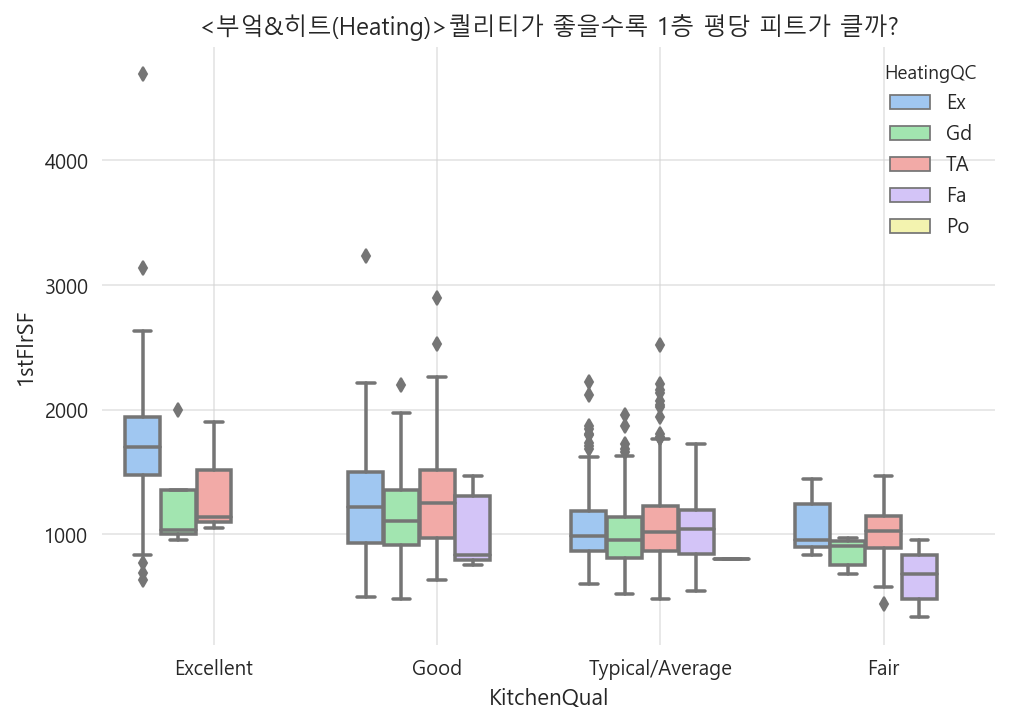

In [95]:
sns.boxplot(data=df, x='KitchenQual', y='1stFlrSF', hue='HeatingQC',
           order=['Ex', 'Gd', 'TA', 'Fa'])
plt.xticks(ticks=np.arange(4),
           labels=['Excellent', 'Good', 'Typical/Average', 'Fair'],
          rotation=0)

plt.title('<부엌&히트(Heating)>퀄리티가 좋을수록 1층 평당 피트가 클까?')
plt.grid(color='lightgrey', alpha=0.5)

In [96]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
